In [1]:
# data
crossing <- read.csv('/Users/alessia/Desktop/border_crossing/Border_Crossing_Entry_Data.csv')

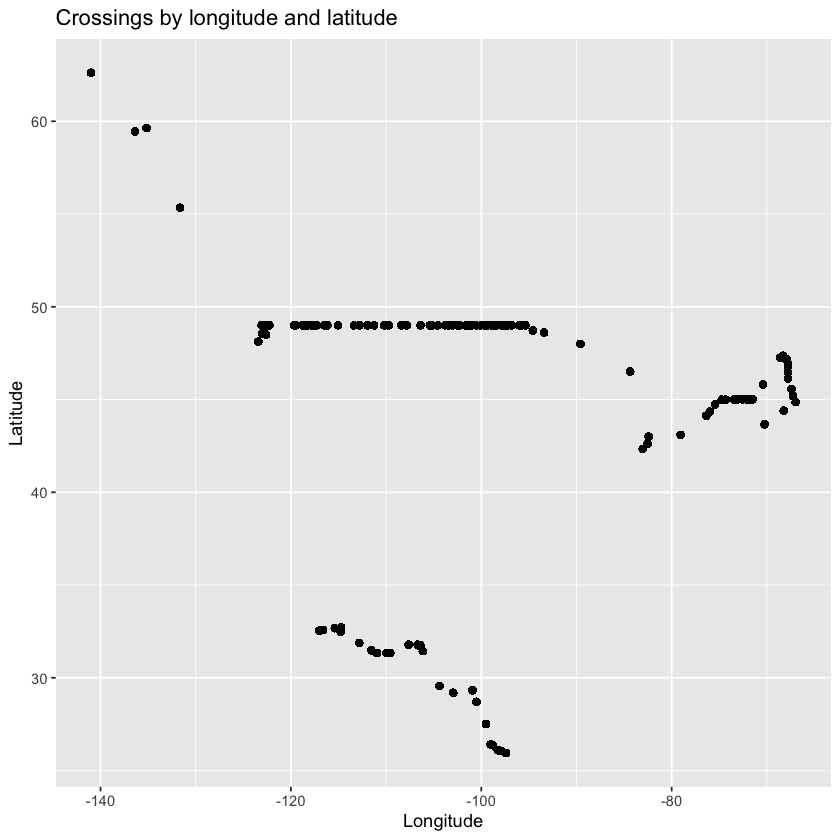

In [2]:
# plot crossings
library(ggplot2)
ggplot(crossing, aes(x = Longitude, y = Latitude)) +
geom_point() +
ggtitle('Crossings by longitude and latitude')

In [11]:
# clean the crossing data
library(dplyr)
suppressPackageStartupMessages(library(dplyr))
crossing <- crossing %>% filter(Latitude < 50)

In [4]:
# load US data
library(maps)
MainStates <- map_data("state")
summary(MainStates)

      long              lat            group           order      
 Min.   :-124.68   Min.   :25.13   Min.   : 1.00   Min.   :    1  
 1st Qu.: -96.22   1st Qu.:33.91   1st Qu.:15.00   1st Qu.: 3899  
 Median : -87.61   Median :38.18   Median :26.00   Median : 7794  
 Mean   : -89.67   Mean   :38.18   Mean   :30.15   Mean   : 7798  
 3rd Qu.: -79.13   3rd Qu.:42.80   3rd Qu.:47.00   3rd Qu.:11699  
 Max.   : -67.01   Max.   :49.38   Max.   :63.00   Max.   :15599  
    region           subregion        
 Length:15537       Length:15537      
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

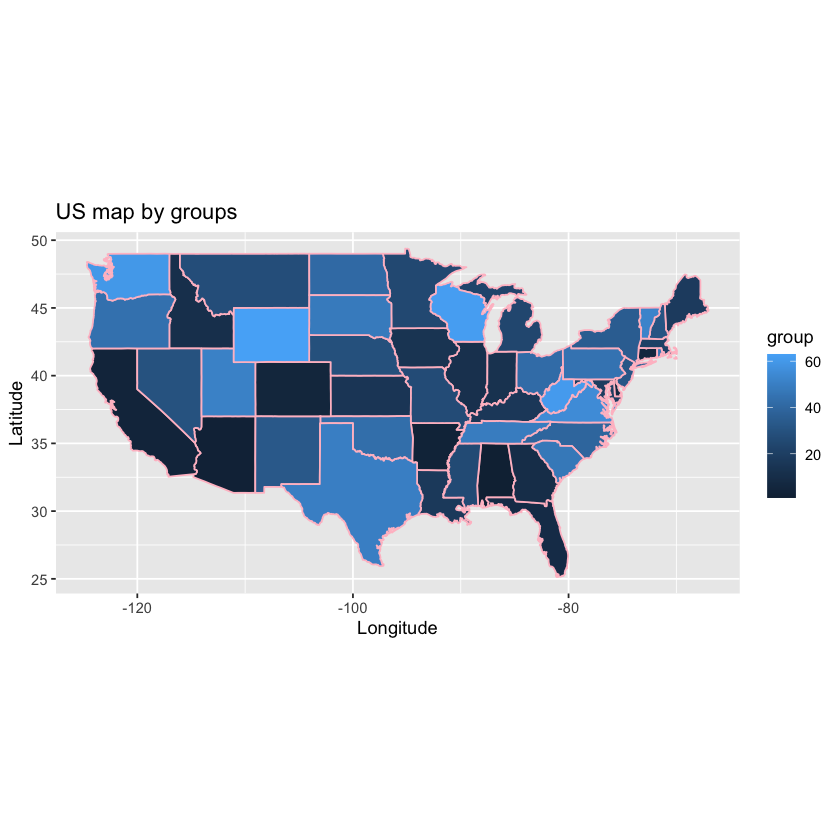

In [5]:
# plot the US map
ggplot(MainStates, aes(long, lat, group = group, fill = group)) +
  geom_polygon(colour = "pink") + 
  coord_quickmap() + 
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map by groups')

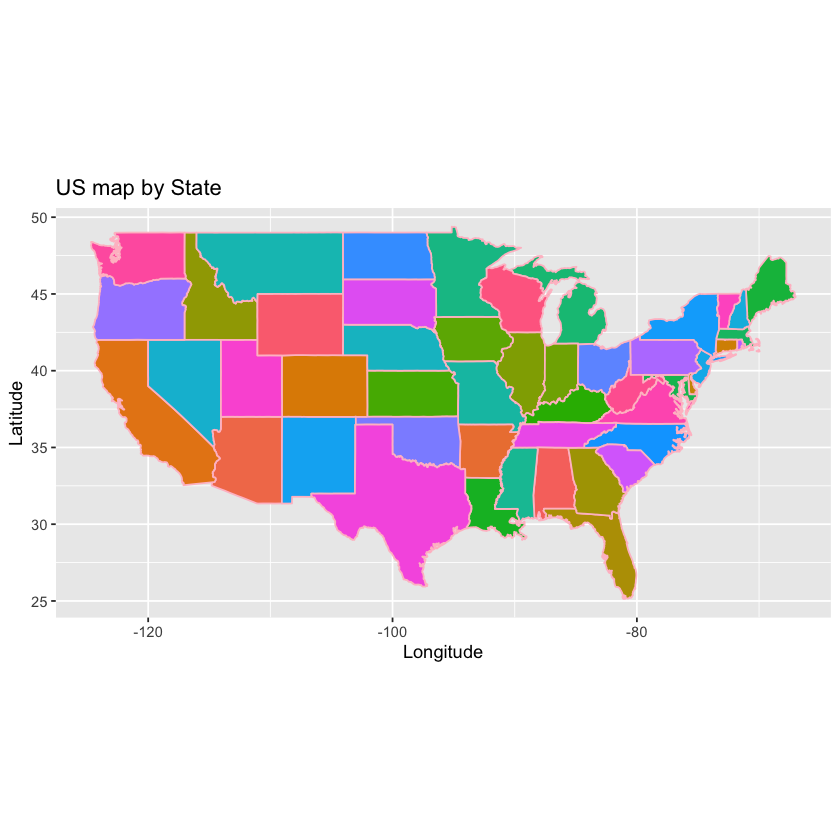

In [6]:
# color the map by State
ggplot(MainStates, aes(long, lat, group = group, fill = region)) +
  geom_polygon(colour = "pink") + 
  coord_quickmap() +
    guides(fill = "none") +
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map by State')

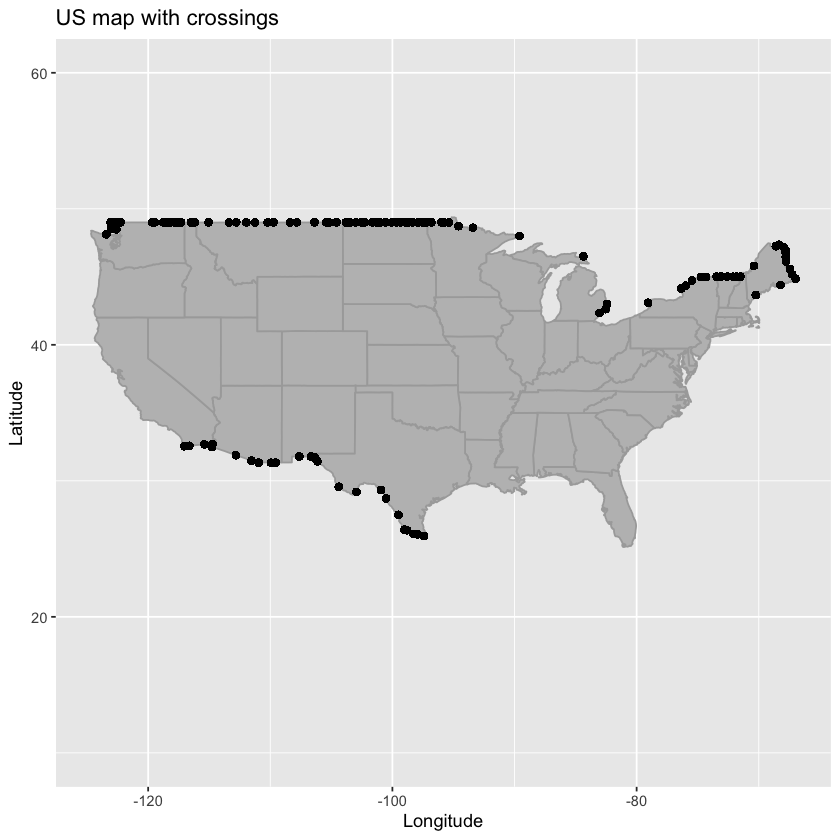

In [7]:
# plot the map and the crossings on top
ggplot()+
  geom_polygon(data = MainStates, aes(x=long, y=lat, group=group), colour="darkgrey",fill="grey") +
  geom_point(data=crossing, aes(x=Longitude, y=Latitude)) +
    guides(fill = 'none') +
    ylim(10, 60) +
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map with crossings')

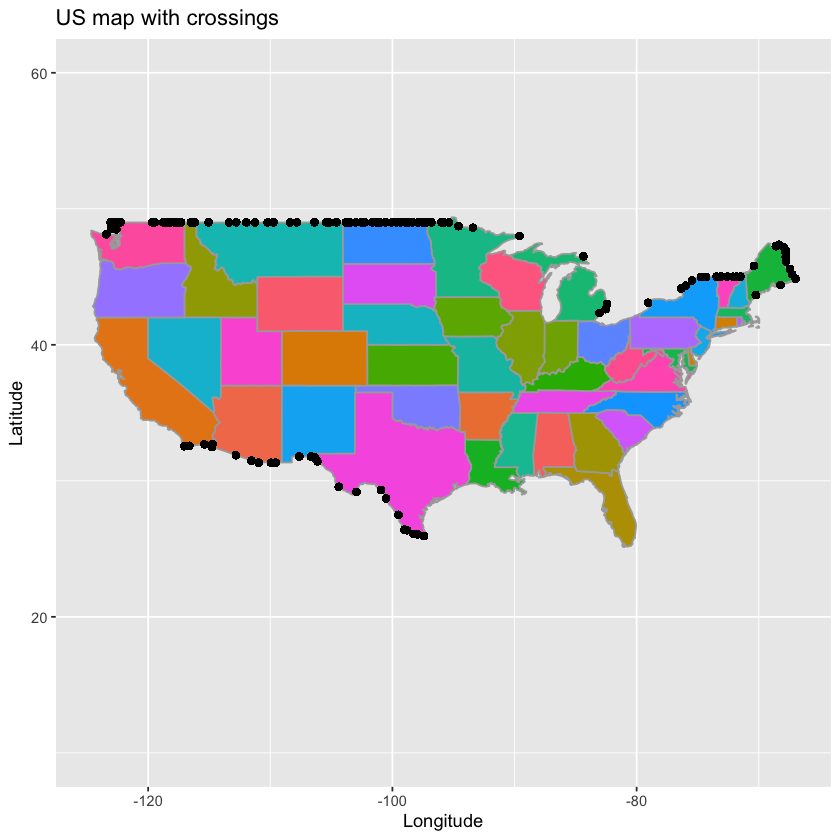

In [8]:
# add colors to the map
ggplot()+
  geom_polygon(data = MainStates, aes(x=long, y=lat, group=group, fill = region), color = 'darkgrey') +
  geom_point(data=crossing, aes(x=Longitude, y=Latitude)) +
    guides(fill = 'none') +
    ylim(10, 60) +
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map with crossings')

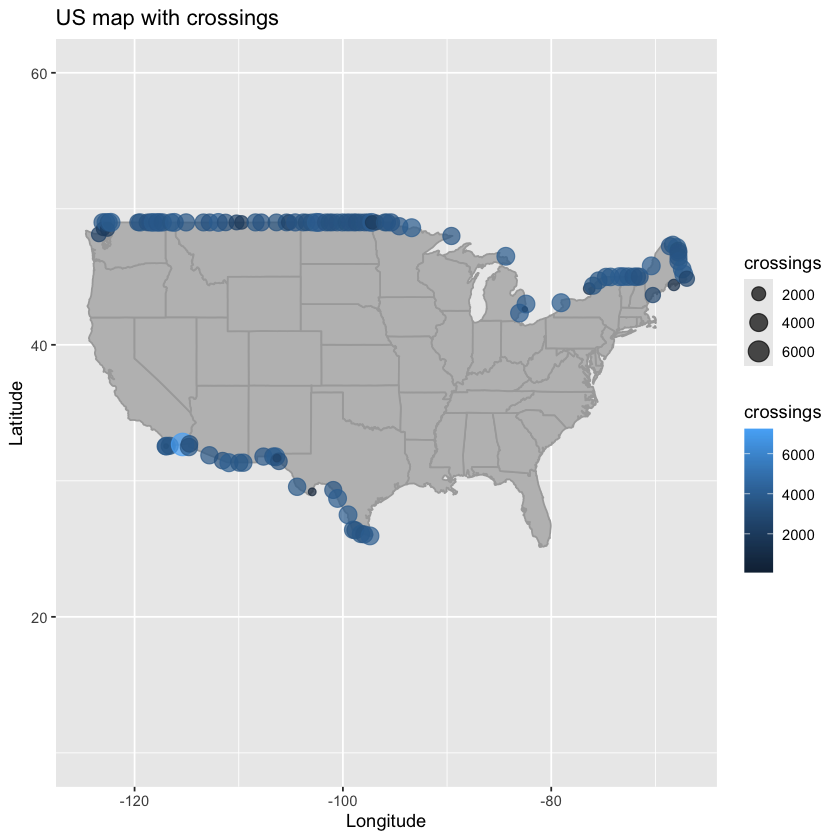

In [9]:
# plot crossings by color and size based on number of crossings in an area
measure_by_position <- crossing %>%
  group_by(Longitude, Latitude) %>%
  summarise(crossings = n(), .groups = 'drop')

ggplot() +
  geom_polygon(data = MainStates, aes(x=long, y=lat, group=group), color = 'darkgrey', fill = 'grey') +
  geom_point(data=measure_by_position, aes(x=Longitude, y=Latitude, size = crossings, color = crossings), alpha = 0.7) +
    guides(fill = 'none') +
    ylim(10, 60) +
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map with crossings')

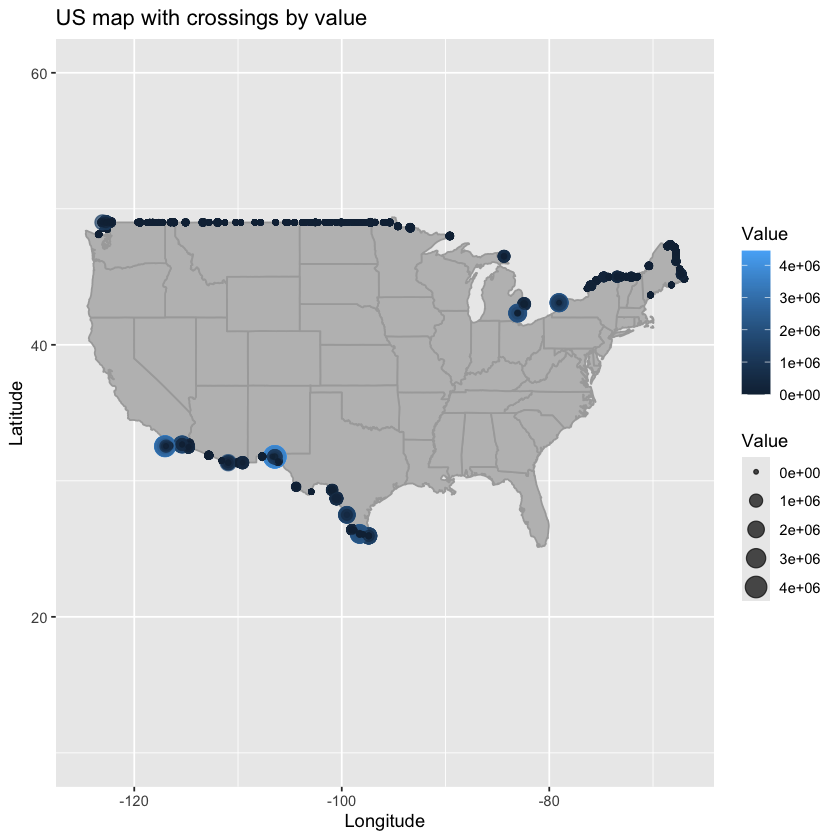

In [10]:
# plot crossings by color and size based on value of crossings
ggplot() +
  geom_polygon(data = MainStates, aes(x=long, y=lat, group=group), color = 'darkgrey', fill = 'grey') +
  geom_point(data=crossing, aes(x=Longitude, y=Latitude, size = Value, color = Value), alpha = 0.7) +
    guides(fill = 'none') +
    ylim(10, 60) +
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map with crossings by value')

Overall, crossings on the Mexican border are less frequent, but they have a higher value than crossings on the Canadian border, constistently with what was found in the visualization part.